In [1]:
import pandas as pd
import numpy as np
from functools import reduce

In [2]:
# Importing data

immi = pd.read_csv("./immigrants-by-nationality.csv")
immi = immi[["Dist", "Nbh", "Nationality", "Number"]]
immi.columns = ['Dist', 'Nbh', 'Nationality', 'num_immi']
immi_original = immi.copy() 

mort = pd.read_excel("./mortality_rate.xlsx")
mort_original = mort.copy() 

rent = pd.read_excel("./rental_price.xlsx")
rent_original = rent.copy()

crime = pd.read_excel("./crime.xlsx")
crime_original = crime.copy()

#no
bars = pd.read_csv("../datasets/Data_filtered/bars.csv", index_col=0)
bars_original = bars.copy()

#no
children_places = pd.read_csv("../datasets/Data_filtered/Children_places.csv", index_col=0)
children_places_original = children_places.copy()

#tot 1s
cinema = pd.read_csv("../datasets/Data_filtered/cinema.csv", index_col=0)
cinema_original = cinema.copy()

#no
education = pd.read_csv("../datasets/Data_filtered/education.csv", index_col=0)
education_original = education.copy()

#no
education_kids = pd.read_csv("../datasets/Data_filtered/educationkids.csv", index_col=0)
education_kids = education_kids.copy()

#no
hospital = pd.read_csv("../datasets/Data_filtered/hospital.csv", index_col=0)
hospital = hospital.copy()

#no
library = pd.read_csv("../datasets/Data_filtered/library.csv", index_col=0)
library = library.copy()

#no
park = pd.read_csv("../datasets/Data_filtered/park.csv", index_col=0)
park = park.copy()

population = pd.read_csv("../datasets/Data_filtered/population.csv", index_col=0)
population = population.copy()

rental = pd.read_csv("../datasets/Data_filtered/rental.csv", index_col=0)
rental = rental.copy()

#no
sport = pd.read_csv("../datasets/Data_filtered/sport.csv", index_col=0)
sport = sport.copy() 

tenants = pd.read_csv("../datasets/Data_filtered/tenants.csv", index_col=0)
tenants = tenants.copy() 

In [3]:
# Grouping immigrants by Nbh, independent of country of origin

immi_dist = immi.groupby(["Nbh","Dist"]).num_immi.sum().reset_index()
immi_dist

,Nbh,Dist,num_immi
0,Baró de Viver,Sant Andreu,92
1,Can Baró,Horta-Guinardó,473
2,Can Peguera,Nou Barris,57
3,Canyelles,Nou Barris,140
4,Ciutat Meridiana,Nou Barris,838
...,...,...,...
69,la Vila Olímpica del Poblenou,Sant Martí,410
70,la Vila de Gràcia,Gràcia,3587
71,les Corts,Les Corts,2276
72,les Roquetes,Nou Barris,920


In [4]:
# Naming Nbh and Dist all the same

rental.columns = ['Nbh', 'rent_price']
tenants.columns = ['Nbh', 'avg_occupation']

In [5]:
# Creating list with all dataframes
# , rental missing --- hi ha moltes files jo el trauria



# Adding datasets that have only Nbh
data_frames1 = [bars, children_places, cinema, education, education_kids, hospital, library, park, sport, population, tenants]
df_merged1 = reduce(lambda left,right: pd.merge(left,right,on=["Nbh"], how='outer'), data_frames1)
df_merged1

,Nbh,Bars,Children_places,Cinemas_Theatres,Schools,Pre-Schools,Hospitals,Libraries_Theatres,Park_Gardens,Sport_Centers,Population,Net_density(hab/ha),avg_occupation
0,Horta,8.0,20.0,8.0,18.0,17.0,6.0,366.0,12.0,7.0,26715.0,422.0,2.5
1,Navas,8.0,8.0,NaN,8.0,6.0,NaN,NaN,NaN,NaN,22129.0,984.0,2.5
2,Pedralbes,6.0,14.0,NaN,16.0,113.0,NaN,141.0,28.0,1.0,12076.0,147.0,2.9
3,Sant Andreu,6.0,54.0,16.0,30.0,26.0,13.0,40.0,24.0,8.0,57183.0,746.0,2.4
4,Sant Antoni,34.0,16.0,34.0,14.0,21.0,6.0,170.0,50.0,8.0,38345.0,928.0,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,les Roquetes,NaN,12.0,NaN,7.0,5.0,6.0,142.0,6.0,NaN,15590.0,856.0,2.7
71,les Tres Torres,NaN,10.0,10.0,3.0,6.0,13.0,142.0,6.0,NaN,16667.0,391.0,3.0
72,la Clota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,610.0,100.0,2.3
73,la Dreta de l'Eixample,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44052.0,387.0,2.4


In [6]:
# Adding datasets that have Nbh and Dist

data_frames2 = [immi_dist, mort, rent]
df_merged2 = reduce(lambda left,right: pd.merge(left,right,on=["Nbh", "Dist"], how='outer'), data_frames2)
df_merged2


,Nbh,Dist,num_immi,mort_rate,rent_price
0,Baró de Viver,Sant Andreu,92.0,"1.067,6",n.d.
1,Can Baró,Horta-Guinardó,473.0,"861,0",2.859
2,Can Peguera,Nou Barris,57.0,"968,0",NaN
3,Canyelles,Nou Barris,140.0,"804,9",NaN
4,Ciutat Meridiana,Nou Barris,838.0,"793,9",1.498
...,...,...,...,...,...
71,les Corts,Les Corts,2276.0,"720,4",4.821
72,les Roquetes,Nou Barris,920.0,"869,4",1.885
73,les Tres Torres,Sarrià-Sant Gervasi,702.0,"708,5",5.689
74,el Poble Sec - Parc Montjuïc,Sants-Montjuïc,NaN,"883,9",3.936


In [7]:
# Adding datasets that have Nbh and Dist (df_merged2) with dataset that has only Dist

df_merged3 = pd.merge(df_merged2, crime, how="left", on="Dist")
df_merged3

,Nbh,Dist,num_immi,mort_rate,rent_price,num_crimes
0,Baró de Viver,Sant Andreu,92.0,"1.067,6",n.d.,10.657
1,Can Baró,Horta-Guinardó,473.0,"861,0",2.859,7.871
2,Can Peguera,Nou Barris,57.0,"968,0",NaN,8.627
3,Canyelles,Nou Barris,140.0,"804,9",NaN,8.627
4,Ciutat Meridiana,Nou Barris,838.0,"793,9",1.498,8.627
...,...,...,...,...,...,...
71,les Corts,Les Corts,2276.0,"720,4",4.821,7.444
72,les Roquetes,Nou Barris,920.0,"869,4",1.885,8.627
73,les Tres Torres,Sarrià-Sant Gervasi,702.0,"708,5",5.689,9.252
74,el Poble Sec - Parc Montjuïc,Sants-Montjuïc,NaN,"883,9",3.936,20.219


In [8]:
# Merging all datasets (df_3 already contains df_1 and df_2)

df = pd.merge(df_merged1, df_merged3, how="left", on="Nbh")
df.head()

,Nbh,Bars,Children_places,Cinemas_Theatres,Schools,Pre-Schools,Hospitals,Libraries_Theatres,Park_Gardens,Sport_Centers,Population,Net_density(hab/ha),avg_occupation,Dist,num_immi,mort_rate,rent_price,num_crimes
0,Horta,8.0,20.0,8.0,18.0,17.0,6.0,366.0,12.0,7.0,26715.0,422.0,2.5,Horta-Guinardó,1127.0,"805,5",2.97,7.871
1,Navas,8.0,8.0,NaN,8.0,6.0,NaN,NaN,NaN,NaN,22129.0,984.0,2.5,Sant Andreu,988.0,"696,0",3.029,10.657
2,Pedralbes,6.0,14.0,NaN,16.0,113.0,NaN,141.0,28.0,1.0,12076.0,147.0,2.9,Les Corts,764.0,"661,6",6.34,7.444
3,Sant Andreu,6.0,54.0,16.0,30.0,26.0,13.0,40.0,24.0,8.0,57183.0,746.0,2.4,Sant Andreu,1965.0,"763,0",3.21,10.657
4,Sant Antoni,34.0,16.0,34.0,14.0,21.0,6.0,170.0,50.0,8.0,38345.0,928.0,2.3,Eixample,2490.0,"737,3",4.591,46.210


In [9]:
# Ordering and renaming columns

df.columns = ['Dist', 'Nbh', 'population', 'num_immi', 'pet_density(hab/ha)', 'avg_occupation', 
              'rent_price', 'mort_rate', 'num_crimes', 'bars', 'children_places', 'cinemas_theatres', 
              'schools', 'pre-schools', 'hospitals', 'libraries_theatres', 'park_gardens', 
              'sport_centers']

## Basic analysis

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 0 to 74
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Dist                 75 non-null     object 
 1   Nbh                  30 non-null     float64
 2   population           72 non-null     float64
 3   num_immi             39 non-null     float64
 4   pet_density(hab/ha)  71 non-null     float64
 5   avg_occupation       71 non-null     float64
 6   rent_price           53 non-null     float64
 7   mort_rate            55 non-null     float64
 8   num_crimes           64 non-null     float64
 9   bars                 48 non-null     float64
 10  children_places      73 non-null     float64
 11  cinemas_theatres     73 non-null     float64
 12  schools              73 non-null     float64
 13  pre-schools          73 non-null     object 
 14  hospitals            73 non-null     float64
 15  libraries_theatres   71 non-null     objec

In [17]:
df.describe()

,Nbh,population,num_immi,pet_density(hab/ha),avg_occupation,rent_price,mort_rate,num_crimes,bars,children_places,cinemas_theatres,schools,hospitals
count,30.000000,72.000000,39.000000,71.000000,71.000000,53.000000,55.000000,64.000000,48.000000,73.000000,73.000000,73.000000,73.000000
mean,47.866667,16.652778,18.564103,14.140845,22.845070,7.528302,128.363636,21.546875,6.625000,22202.863014,682.643836,2.519178,1333.219178
std,53.438804,13.324931,25.792487,10.396834,25.970119,4.622702,144.480341,28.682127,5.963096,14622.058303,290.236128,0.188309,1088.180582
min,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,610.000000,32.000000,2.200000,32.000000
25%,8.000000,8.000000,4.000000,7.000000,8.500000,4.000000,30.000000,4.000000,1.750000,10401.000000,499.000000,2.400000,603.000000
50%,23.000000,14.000000,10.000000,12.000000,16.000000,6.000000,76.000000,8.000000,6.000000,20487.000000,710.000000,2.500000,1073.000000
75%,62.000000,20.000000,17.000000,19.000000,26.500000,11.000000,142.000000,26.500000,9.250000,30584.000000,888.000000,2.500000,1791.000000
max,156.000000,77.000000,120.000000,46.000000,155.000000,22.000000,548.000000,132.000000,28.000000,58180.000000,1490.000000,3.000000,5400.000000


In [12]:
df.corr()

,Nbh,population,num_immi,pet_density(hab/ha),avg_occupation,rent_price,mort_rate,num_crimes,bars,children_places,cinemas_theatres,schools,hospitals
Nbh,1.000000,-0.009375,0.581025,0.124689,0.121017,0.194135,0.403030,0.292597,-0.094837,0.261355,0.007189,-0.123045,0.681053
population,-0.009375,1.000000,0.073618,0.213602,0.121926,0.107121,0.024328,0.327031,0.017071,0.380914,0.137235,-0.079969,0.313003
num_immi,0.581025,0.073618,1.000000,0.262788,0.196625,-0.021023,0.513466,0.332003,0.053374,0.370150,0.059359,-0.175606,0.628578
pet_density(hab/ha),0.124689,0.213602,0.262788,1.000000,0.477782,0.389225,0.104862,0.388961,0.192620,0.641080,-0.000292,-0.149846,0.460816
avg_occupation,0.121017,0.121926,0.196625,0.477782,1.000000,0.348909,0.473586,0.431293,-0.107286,0.283225,-0.115931,0.027540,0.322261
rent_price,0.194135,0.107121,-0.021023,0.389225,0.348909,1.000000,-0.039122,0.026659,-0.042723,0.318933,-0.255956,-0.016712,0.251515
mort_rate,0.403030,0.024328,0.513466,0.104862,0.473586,-0.039122,1.000000,0.491994,0.112597,0.119567,0.072740,0.035135,0.429553
num_crimes,0.292597,0.327031,0.332003,0.388961,0.431293,0.026659,0.491994,1.000000,0.215283,0.431662,-0.044830,-0.001215,0.520666
bars,-0.094837,0.017071,0.053374,0.192620,-0.107286,-0.042723,0.112597,0.215283,1.000000,0.261606,0.219369,-0.249955,0.171246
children_places,0.261355,0.380914,0.370150,0.641080,0.283225,0.318933,0.119567,0.431662,0.261606,1.000000,0.398740,-0.300605,0.869310


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x123041f10>,
      dtype=object)

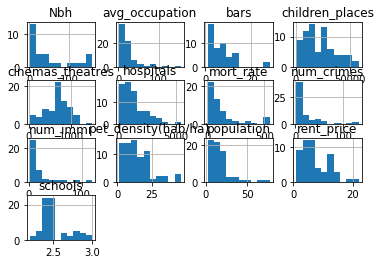

In [13]:
df.hist()

In [14]:
df.mean()

Nbh                       47.866667
population                16.652778
num_immi                  18.564103
pet_density(hab/ha)       14.140845
avg_occupation            22.845070
rent_price                 7.528302
mort_rate                128.363636
num_crimes                21.546875
bars                       6.625000
children_places        22202.863014
cinemas_theatres         682.643836
schools                    2.519178
hospitals               1333.219178
dtype: float64

## Analitzant barris per paisos

In [20]:
immi

,Dist,Nbh,Nationality,num_immi
0,Ciutat Vella,el Raval,Spain,1109
1,Ciutat Vella,el Barri Gòtic,Spain,482
2,Ciutat Vella,la Barceloneta,Spain,414
3,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",Spain,537
4,Eixample,el Fort Pienc,Spain,663
...,...,...,...,...
11761,Sant Martí,el Besòs i el Maresme,No information,0
11762,Sant Martí,Provençals del Poblenou,No information,0
11763,Sant Martí,Sant Martí de Provençals,No information,0
11764,Sant Martí,la Verneda i la Pau,No information,0


In [28]:
immi.groupby("Nationality")["Nbh"].sum()


Nationality
Afghanistan    el Ravalel Barri Gòticla BarcelonetaSant Pere,...
Albania        el Ravalel Barri Gòticla BarcelonetaSant Pere,...
Algeria        el Ravalel Barri Gòticla BarcelonetaSant Pere,...
Andorra        el Ravalel Barri Gòticla BarcelonetaSant Pere,...
Angola         el Ravalel Barri Gòticla BarcelonetaSant Pere,...
                                     ...                        
Venezuela      el Ravalel Barri Gòticla BarcelonetaSant Pere,...
Vietnam        el Ravalel Barri Gòticla BarcelonetaSant Pere,...
Yemen          el Ravalel Barri Gòticla BarcelonetaSant Pere,...
Zambia         el Ravalel Barri Gòticla BarcelonetaSant Pere,...
Zimbabwe       el Ravalel Barri Gòticla BarcelonetaSant Pere,...
Name: Nbh, Length: 159, dtype: object